In [93]:
import pickle
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

In [94]:
energies = pickle.load(open('./designer_net0_data/test1/energies.pkl','rb'))
optimized_diameters = pickle.load(open('./designer_net0_data/test1/optimized_diameters.pkl','rb'))
prices = pickle.load(open('./designer_net0_data/test1/prices.pkl','rb'))

In [95]:
eref = -9689
energies = np.abs(np.array(energies) - eref)

In [96]:
data = {}

for opt, e in zip(optimized_diameters, energies):
    if tuple(opt) not in data:
        data[tuple(opt)] = []
    data[tuple(opt)].append(e[0])
vals = []
labels = []
for k, v in data.items():
    labels.append(k)
    vals.append(v)

width = np.array([(np.array(optimized_diameters) == l).prod(1).sum() for l in labels])
width = 0.5 * width / np.max(width)

In [97]:
positions = []
idx = {(500,500):1, (500,1000):2, (250,250):3, (250,1000):4, (250,500):5}
for p in optimized_diameters:
    positions.append(idx[tuple(p)])

Text(0, 0.5, 'Energy')

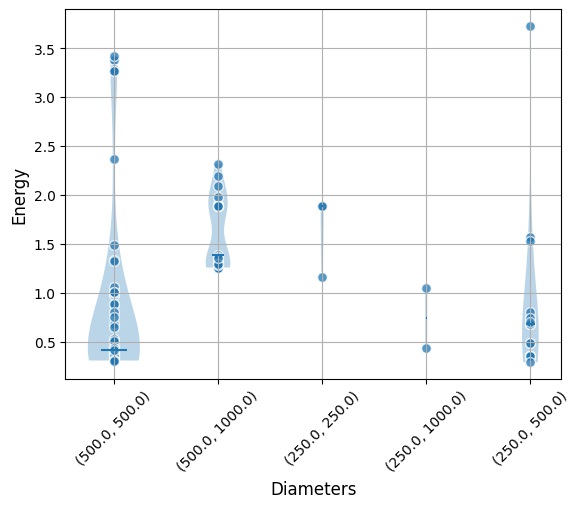

In [98]:
plt.violinplot(vals, widths=width, showextrema=False, showmedians=True)
plt.scatter(positions, energies,s=50,  alpha=0.75, edgecolors='w' )
plt.xticks(list(range(1, 1 + len(labels))), labels, rotation=45)
plt.grid()
plt.xlabel('Diameters', fontsize=12)
plt.ylabel('Energy', fontsize=12)

In [103]:

np.min(vals[0])

0.3081985158405587

In [101]:
np.min(vals[-1])

0.29128992046207713